# **<font color = 'green'>Yulu Case Study**
## **<font color = 'blue'>About Yulu**
About Yulu
Yulu is India’s leading **micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.**

**Yulu zones** are located at all the appropriate locations (including **metro stations, bus stands, office spaces, residential areas, corporate offices, etc**) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want **to understand the factors affecting the demand for these shared electric cycles in the Indian market**.

**<font color = 'Red'>Problem Statement : -**

**The company wants to know:**

- **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**
- **How well those variables describe the electric cycle demands**

**Importing Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [ ]:
!gdown 1w6J8jdf5DZGJLlYjKwFnFfpfvKMCIOpC

Downloading...
From: https://drive.google.com/uc?id=1w6J8jdf5DZGJLlYjKwFnFfpfvKMCIOpC
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 150MB/s]


**Reading the dataset**

In [ ]:
df = pd.read_csv('yulu.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**no of rows amd columns in dataset**

In [ ]:
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Datatype of following attributes needs to changed to proper data type**

- datetime - to datetime
- season - to categorical
- holiday - to categorical
- workingday - to categorical
- weather - to categorical

**null values**

In [ ]:
# detecting null values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Insight : -**

**There are no missing values present in the dataset.**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


**Insight : -**

casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [ ]:
# minimum datetime and maximum datetime
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [ ]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [ ]:
df['day'] = df['datetime'].dt.day_name()

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


**Slicing Data by Time**

In [ ]:
# setting the 'datetime' column as the index of the DataFrame 'df'
df.set_index('datetime', inplace = True)

# By setting the 'datetime' column as the index, it allows for easier and more efficient access,
    # filtering, and manipulation of the data based on the datetime values.
# It enables operations such as resampling, slicing by specific time periods, and
    # applying time-based calculations.

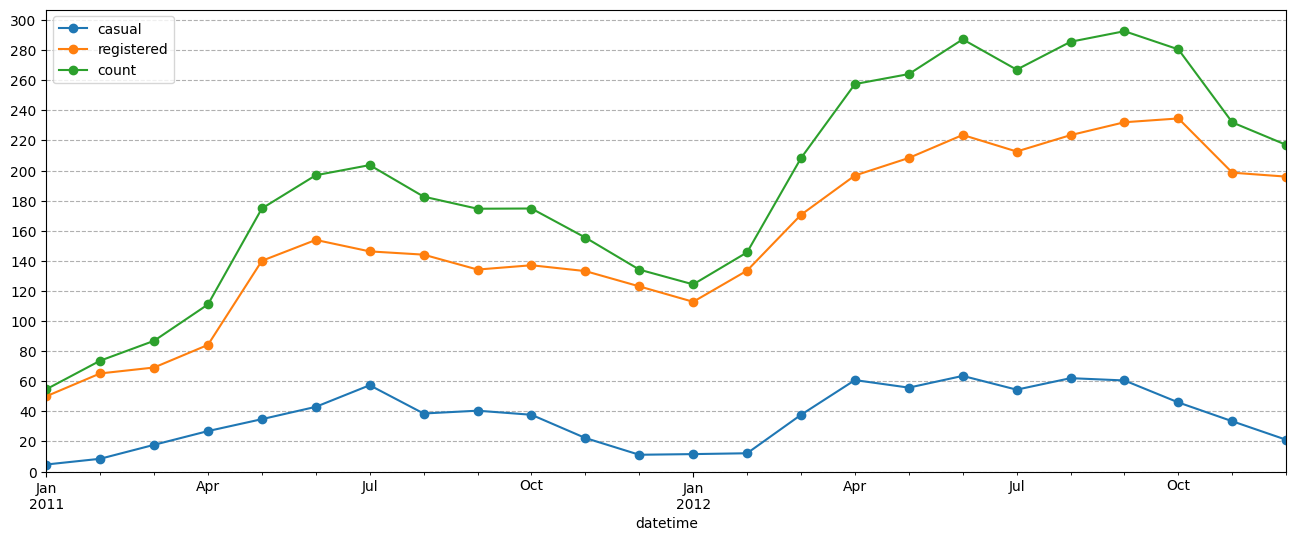

In [ ]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered',
    # and 'count' variables,  allowing for easy comparison and analysis of their patterns over time

plt.figure(figsize = (16, 6))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value
    # of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()      # displaying the plot

**Value_counts -**

In [ ]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

In [ ]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)


0    97.14
1     2.86
Name: holiday, dtype: float64

In [ ]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)


1    68.09
0    31.91
Name: workingday, dtype: float64

In [ ]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)


1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

## **Univariate Analysis**

[]

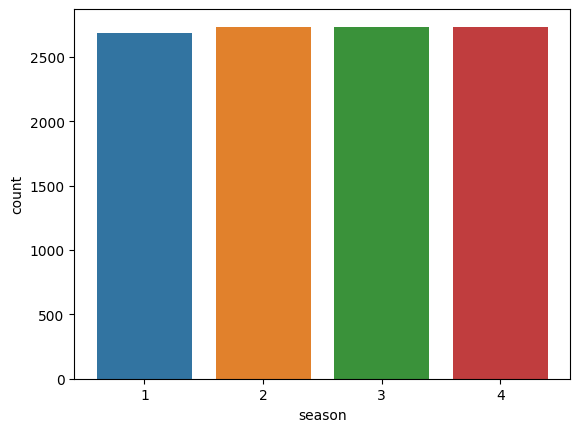

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of season in the dataset
sns.countplot(data = df, x = 'season')
plt.plot()   # displaying the plot

[]

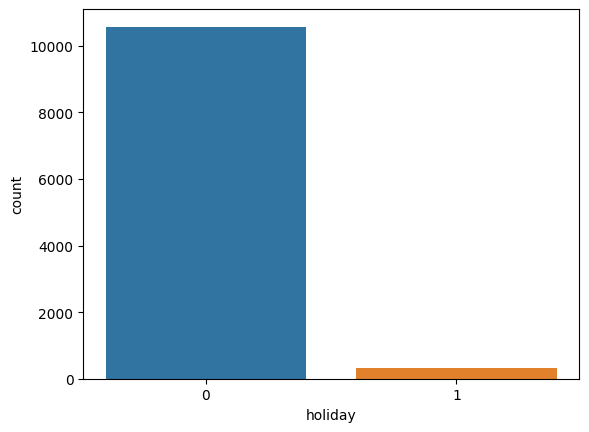

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of holiday in the dataset

sns.countplot(data = df, x = 'holiday')
plt.plot()       # displaying the chart

[]

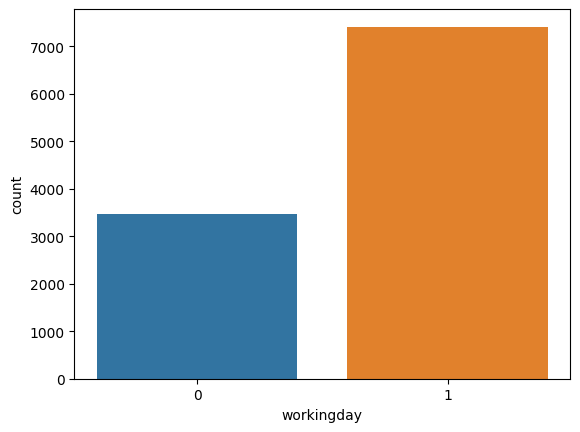

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday')
plt.plot()      # displaying the chart

[]

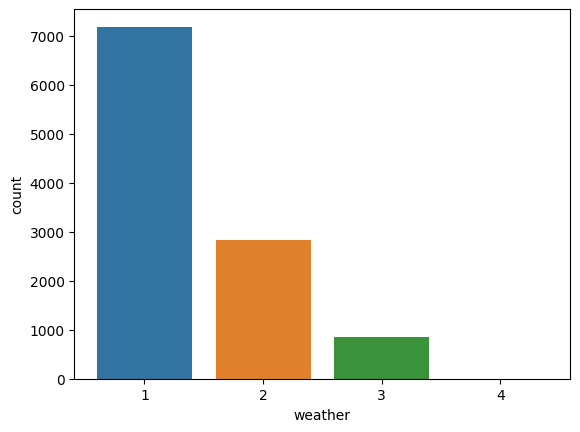

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of weather in the dataset

sns.countplot(data = df, x = 'weather')
plt.plot()        # displaying the chart

[]

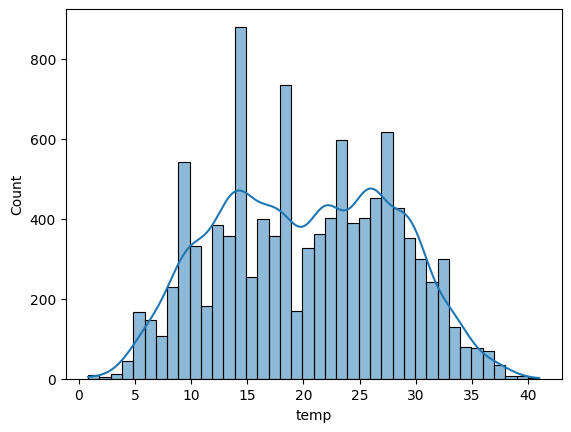

In [ ]:
# The below code generates a histogram plot for the 'temp' feature, showing the distribution of
    # temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

In [ ]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

**Insight : -**
- The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

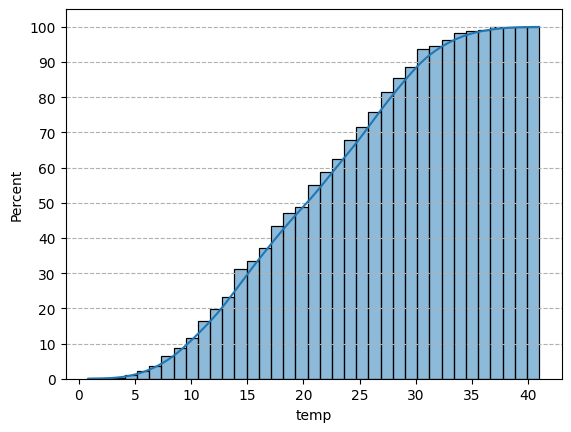

In [ ]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative
    # distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

[]

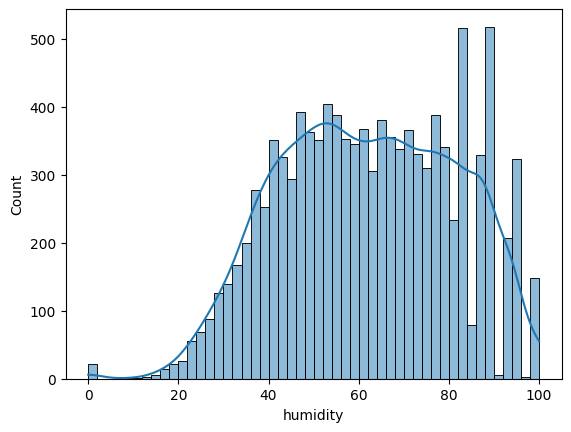

In [ ]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of
    # humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

In [ ]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

**Insight :-**
- The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

### **Outliers Detection**

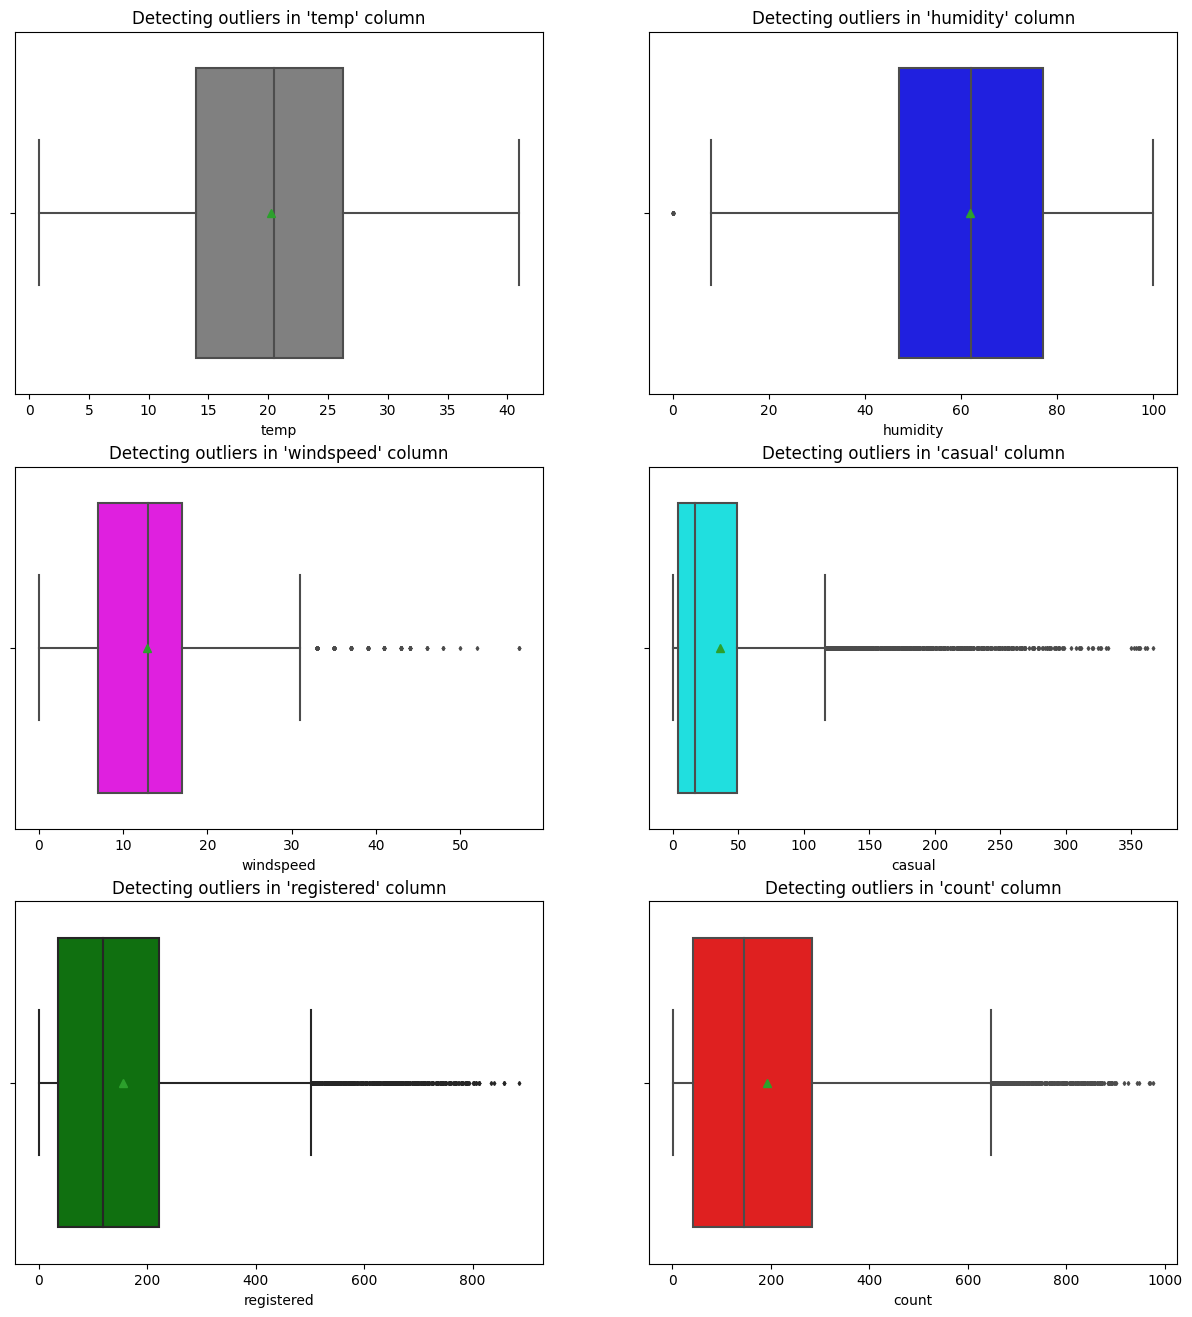

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

**Insight :-**
- There is no outlier in the temp column.
- There are few outliers present in humidity column.
- There are many outliers present in each of the columns : windspeed, casual, registered, count.

## **Bivariate Analysis**

[]

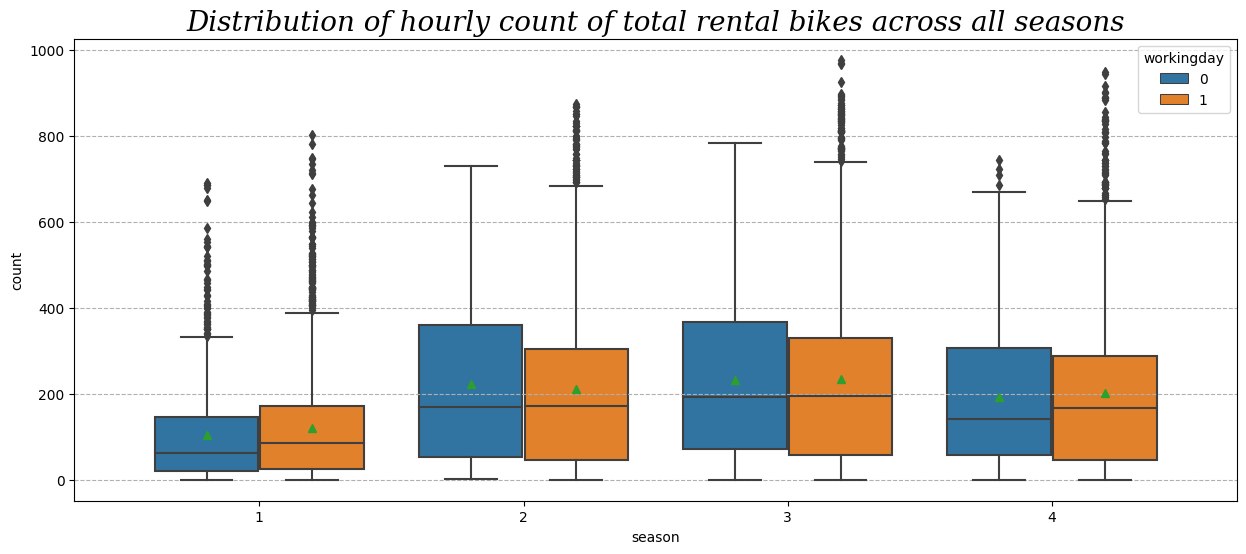

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

**Insight :-**
- The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

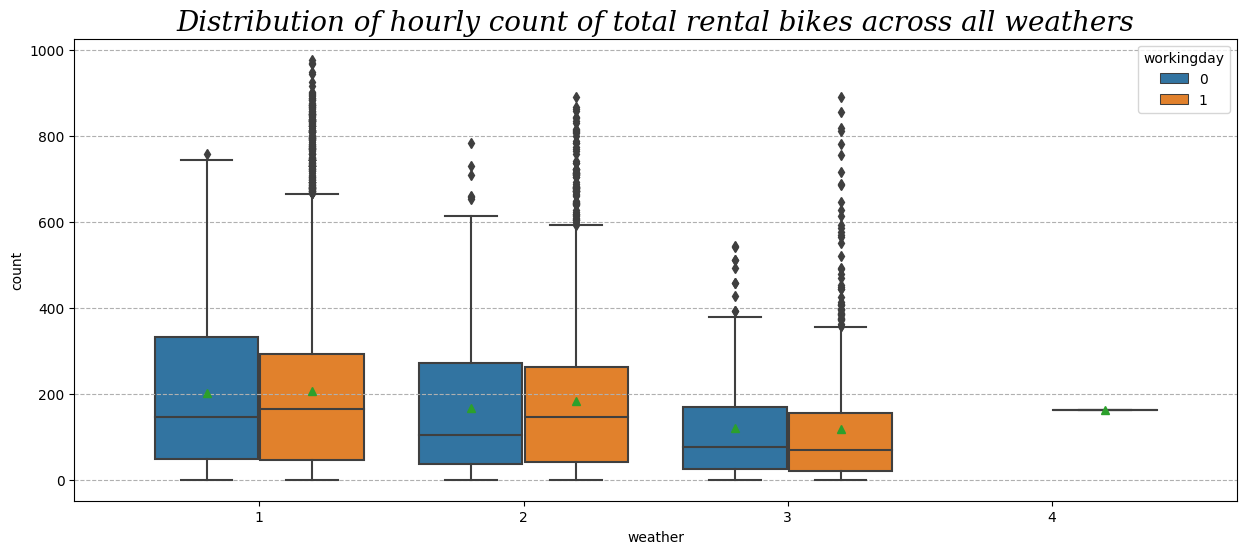

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

**Insight :-**
- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

**Is there any effect of Working Day on the number of electric cycles rented ?**

In [ ]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

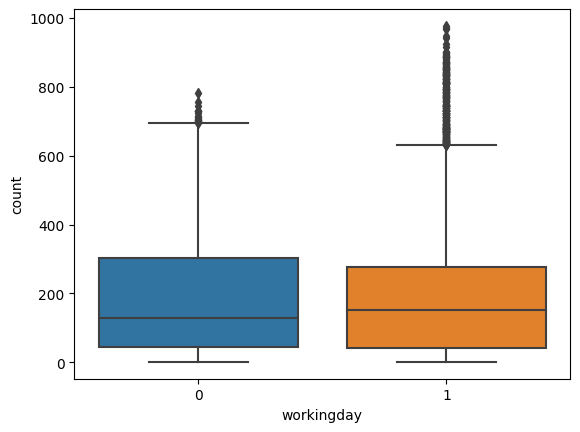

In [ ]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

## **<font color = 'green'>Hypothesis Testing**

**Set up Null Hypothesis -**

**Null Hypothesis ( H0 ) -** Working Day does not have any effect on the number of electric cycles rented.

**Alternate Hypothesis ( HA ) -** Working Day has some effect on the number of electric cycles rented

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- **Distribution check using QQ Plot**

- **Homogeneity of Variances using Levene's test**

**STEP-3: Define Test statistics; Distribution of T under H0.**

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**

We set our **alpha to be 0.05**

**STEP-5 : Compare p-value and alpha.**

Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0


**Visual Tests to know if the samples follow normal distribution**

[]

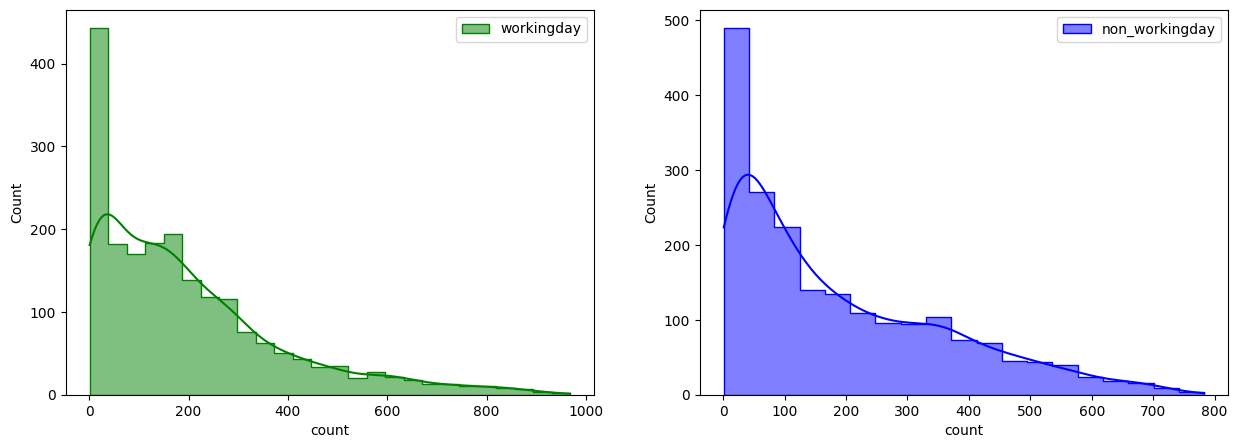

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**

***Distribution check using QQ Plot***

[]

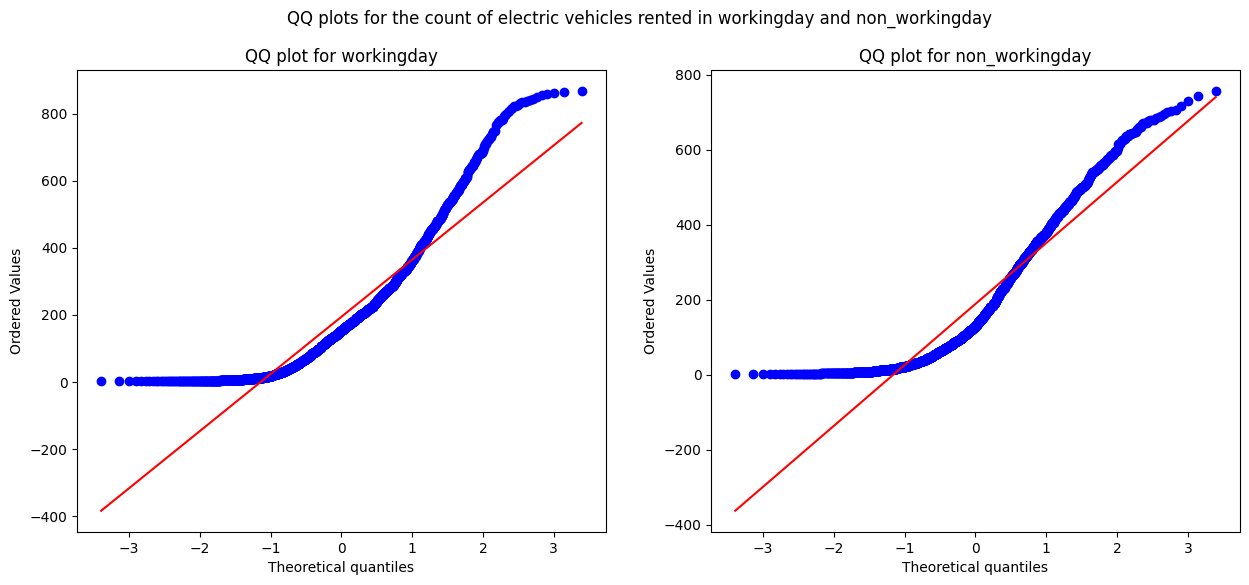

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**

**Applying Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.023314629428612e-38
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7709296998112047e-36
The sample does not follow normal distribution


**Applying  Lavene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.732124937920863
The samples have Homogenous Variance 


### **Is there any effect of holidays on the number of electric cycles rented ?**

In [ ]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

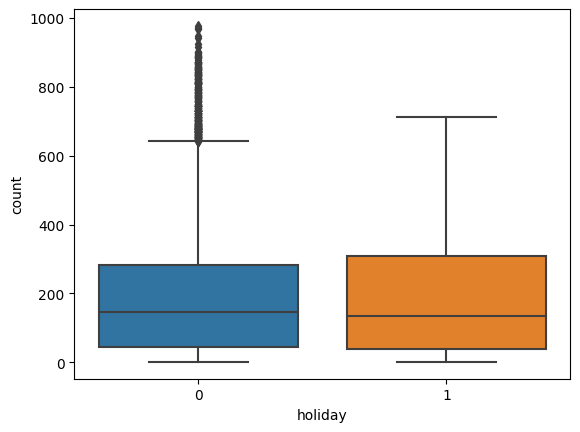

In [ ]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

**Visual Tests to know if the samples follow normal distribution**
>> **histplot**

[]

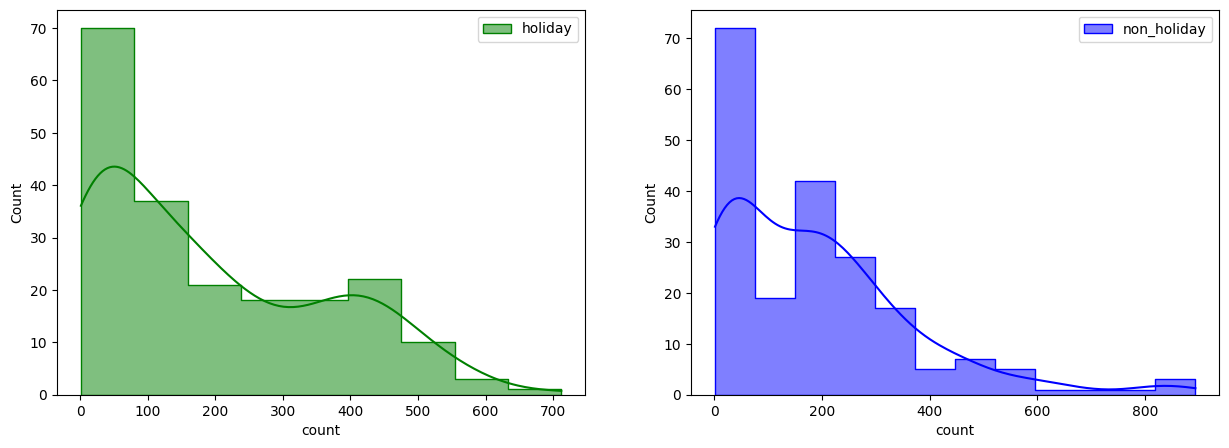

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**


***Distribution check using QQ Plot***

[]

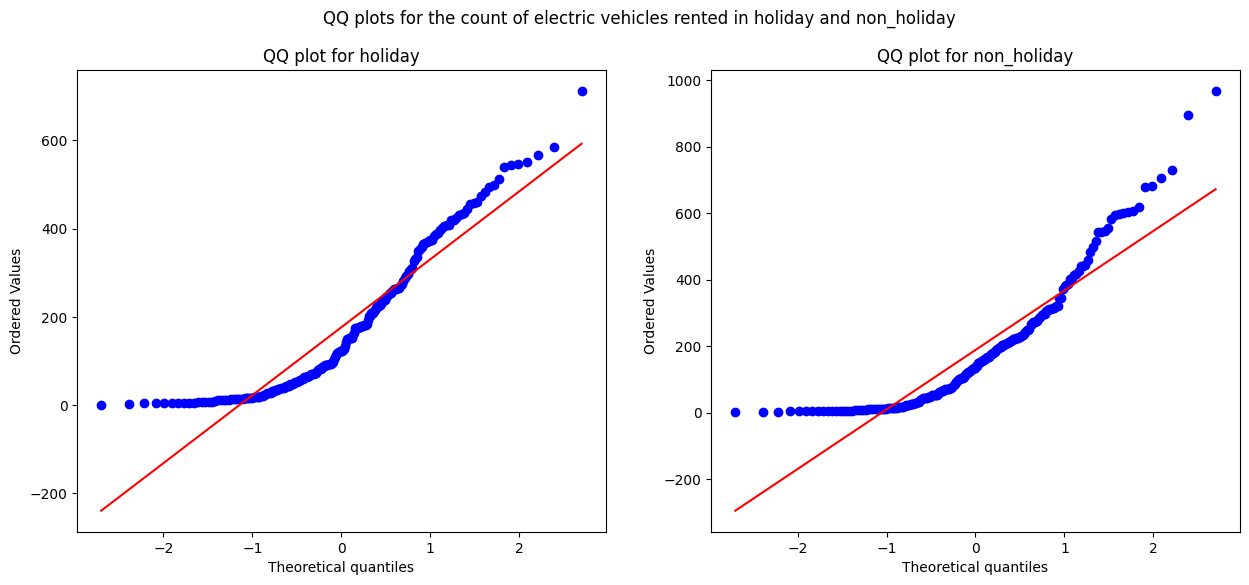

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**

**Applying Shapiro-Wilk test for normality**

In [ ]:

test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5340296810606446e-09
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.303151569077905e-12
The sample does not follow normal distribution


**Applying Levene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.7958248886939546
The samples have Homogenous Variance 


### **Is weather dependent on the season ?**

In [ ]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


**It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.**


**Null Hypothesis ( H0 ) - weather is independent of season**

**Alternate Hypothesis ( HA ) - weather is dependent of seasons.**

>> **Applying Chi-square statistic**

In [ ]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009,76406,12919,164
2,426350,134177,27755,0
3,470116,139386,31160,0
4,356588,157191,30255,0


* Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [ ]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]])

In [ ]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


**Comparing p value with significance level**

In [ ]:
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


- **Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.**

### **Is the number of cycles rented is similar or different in different weather ?**

In [ ]:
df.groupby(by = 'weather')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

**Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3.**

**Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.**

**Steps -**
- Normality check using QQ Plot.
- Homogeneity of Variances using Levene's test
- **<font color = 'blue'>Since , Here More than 2 categories are available So we will Apply ANOVA test**

**Visual Tests to know if the samples follow normal distribution**

[]

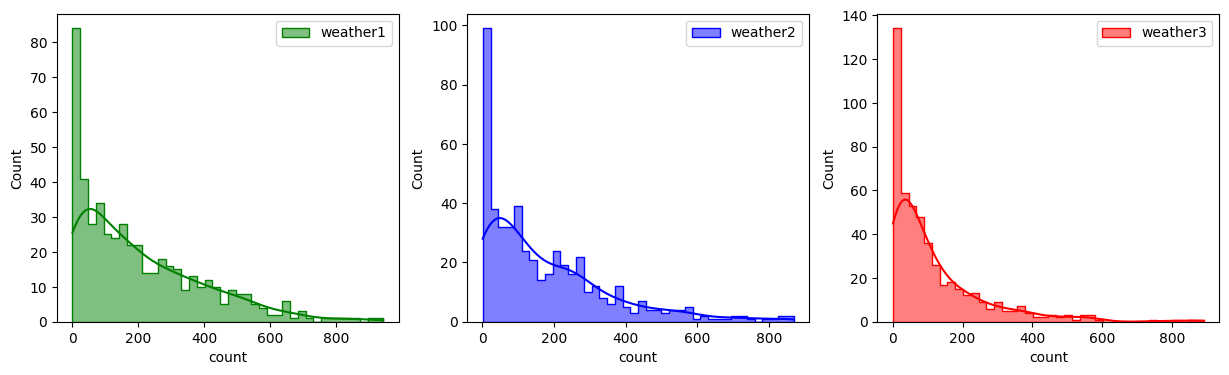

In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**


***Distribution check using QQ Plot***



[]

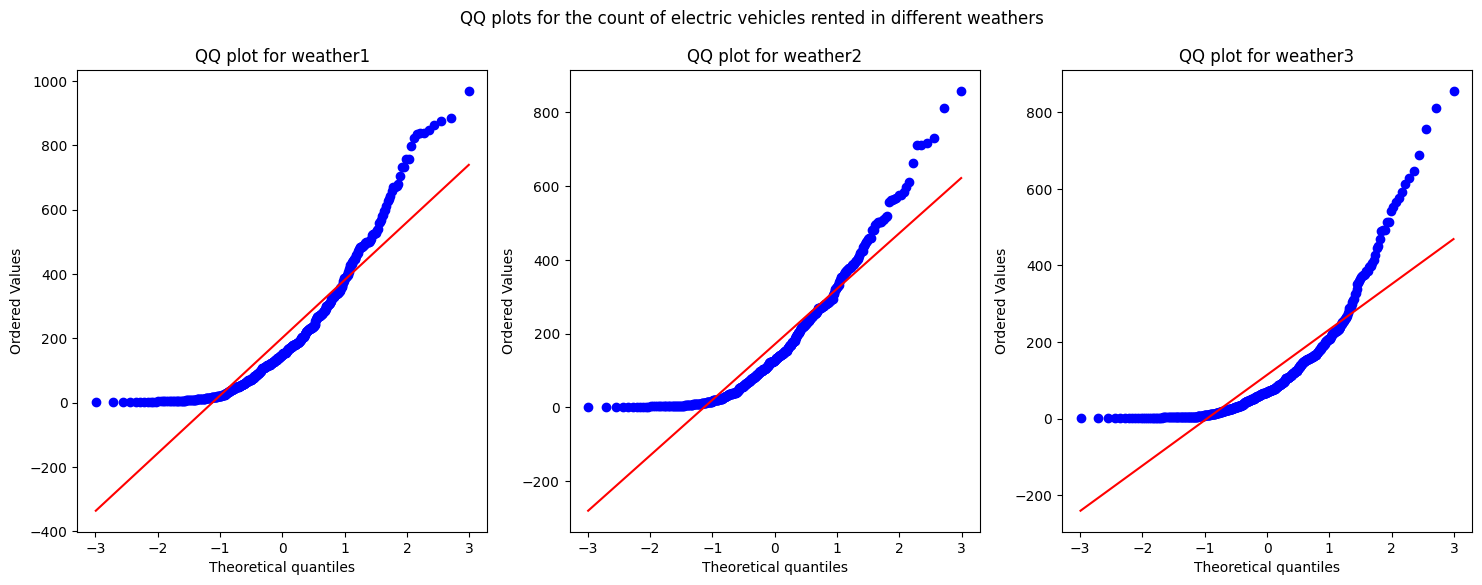

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

* **It can be inferred from the above plot that the distributions do not follow normal distribution.**


**Applying Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3402741290747703e-18
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3301086221837706e-19
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.48844284952964e-27
The sample does not follow normal distribution


**Applying Levene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 3.8586756871360504e-11
The samples do not have  Homogenous Variance


>>**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform  Kruskal-Wallis H-test for independent samples.**

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = [1.83091584e+00 5.37649760e+00 1.56915686e+01 1.08840000e+04
 3.70017441e+01 4.14298489e+01 1.83168690e+03 2.80380482e+01
 2.84639685e+02 1.73745440e+02 2.04955668e+02 7.08445555e+01]
p value = [4.00333264e-01 6.79999165e-02 3.91398508e-04 0.00000000e+00
 9.22939752e-09 1.00837627e-09 0.00000000e+00 8.15859150e-07
 1.55338046e-62 1.86920588e-38 3.12206618e-45 4.13333147e-16]


In [ ]:
if p_value.all() < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


- **Therefore, the average number of rental bikes is statistically different for different weathers.**

### **Is the number of cycles rented is similar or different in different season ?**

In [ ]:
df.groupby(by = 'season')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**season: season (1: spring, 2: summer, 3: fall, 4: winter)**

In [ ]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

**Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.**

**Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.**

**Steps -**

- Normality check using histplot, QQ Plot.
- Homogeneity of Variances using Levene's test
- **<font color = 'blue'>Since , Here More than 2 categories are available So we will Apply ANOVA test**



**Visual Tests to know if the samples follow normal distribution**



[]

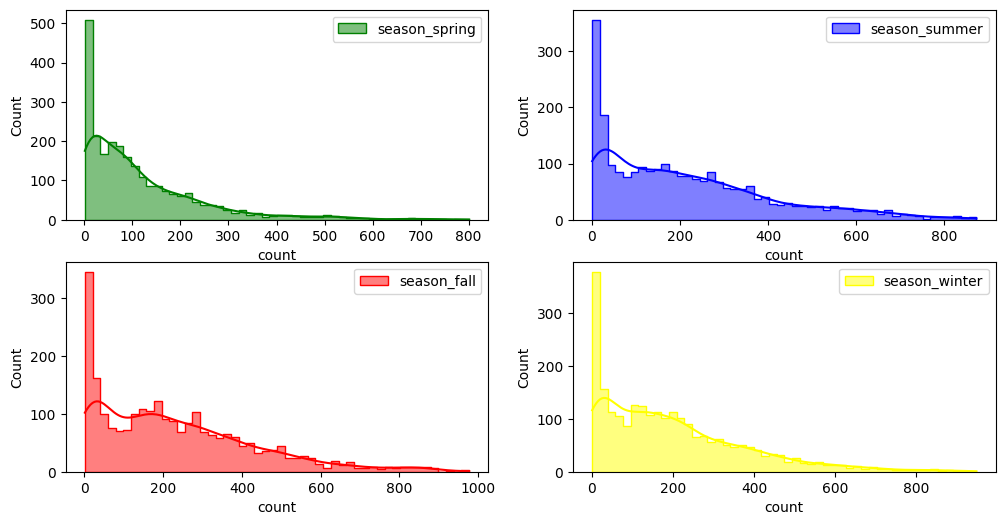

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

- **It can be inferred from the above plot that the distributions do not follow normal distribution.**

***Distribution check using QQ Plot***

[]

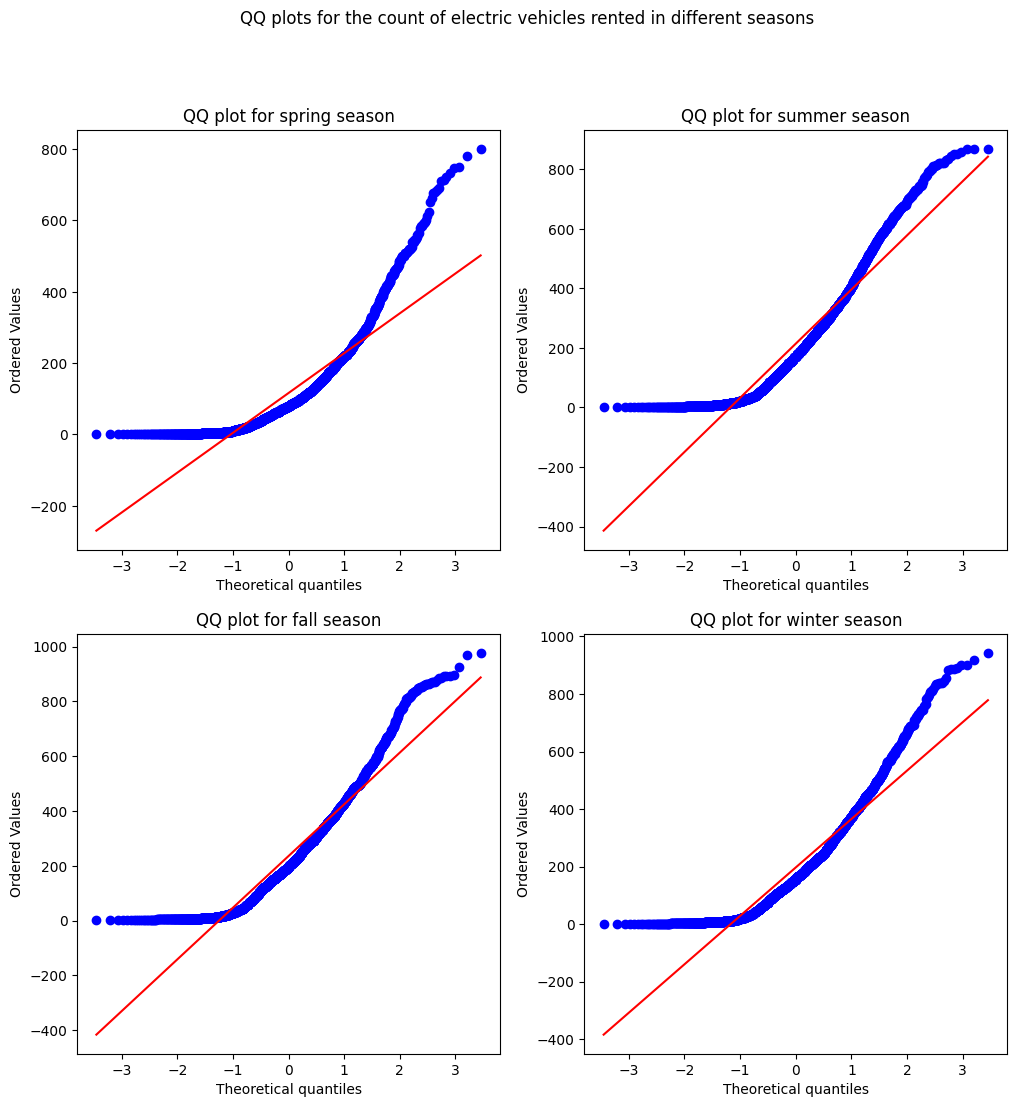

In [ ]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

- **It can be inferred from the above plots that the distributions do not follow normal distribution.**


**Applying Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.666212643545828e-38
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.2527573116605774e-35
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.978517544243642e-38
The sample does not follow normal distribution


**Applying Levene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 9.1726154627839e-109
The samples do not have  Homogenous Variance


>> **Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform Kruskal-Wallis H-test for independent samples.**

**Kruskal-Wallis H-test**

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


**Comparing p value with significance level**

In [ ]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis



- **Therefore, the average number of rental bikes is statistically different for different seasons.**

### **Correlation -**

In [ ]:
corr_data = df.corr()
corr_data

<ipython-input-125-f9b45ce29f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


[]

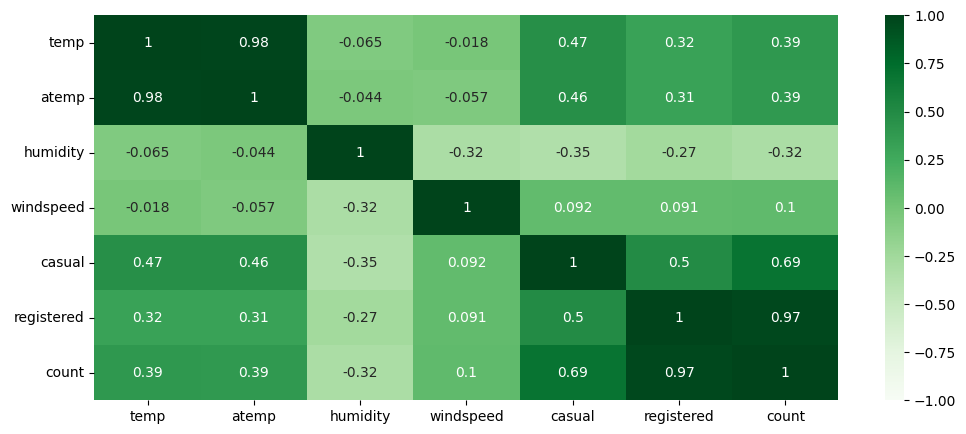

In [ ]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

- Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
- High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
- Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
- Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
- Negligible correlation exists between all other combinations of columns.

# **<font color = 'blue'>Recommendations**
**Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

**Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours.

**Weather-based Promotions:** Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

**User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

**Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. check weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

**Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.